# Suicide Rate Analysis

## Objective

* This Project is aimed at accessing Mental health generally by analyzing global suicide rate data 
* Predicting sentiment and Suicide intentions in tweets from Twitter.com

## Install & Import Libraries

In [128]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_profiling import ProfileReport
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_palette("pastel")
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from chart_studio import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go 
import plotly.express as px 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.tools as ctls
%matplotlib inline

#log in to plotly

username = "***"
api_key = "***"

ctls.set_credentials_file(username = username, api_key = api_key)



## Dataset Preview


In [130]:
df_age = pd.read_csv("Age-standardized suicide rates.csv")
df_age.head()

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2


In [131]:
age_report = ProfileReport(df_age, title = "Age Standardized Suicide Rate")
age_report.to_widgets()
age_report.to_file("Age Standardized Suicide Rate.html")

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 158.39it/s]


In [132]:
df_sr = pd.read_csv("master.csv")
df_sr.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [133]:
sr_report = ProfileReport(df_sr, title = "Suicide Rate")
sr_report.to_widgets()
sr_report.to_file("Suicide Rate.html")

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 75.86it/s]


In [134]:
df_sro = pd.read_csv("master.csv")
df_sro.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [135]:
sro_report = ProfileReport(df_sro, title = "Suicide Rate overview")
sro_report.to_widgets()
sro_report.to_file("Suicide Rate Overview.html")

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


## Exploratory Data Analysis

In [136]:
#Replace empty spaces in sex values
df_age.replace([" Both sexes", " Male", " Female"], ["Both sexes", "Male", "Female"], inplace = True)

In [137]:
#Both sexes dataset
df_age_both = df_age[df_age["Sex"] == "Both sexes"]
df_age_both.head()

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
3,Albania,Both sexes,5.6,5.3,7.7,5.8
6,Algeria,Both sexes,3.3,3.4,3.5,4.7
9,Angola,Both sexes,8.9,9.3,10.4,13.9
12,Antigua and Barbuda,Both sexes,0.5,0.8,0.2,2.1


In [138]:
#Male dataset
df_age_male = df_age[df_age["Sex"] == "Male"]
df_age_male.head()

,Country,Sex,2016,2015,2010,2000
1,Afghanistan,Male,10.6,10.9,12.5,14.3
4,Albania,Male,7.0,6.7,9.5,8.2
7,Algeria,Male,4.9,5.0,5.1,6.7
10,Angola,Male,14.0,14.8,16.7,21.9
13,Antigua and Barbuda,Male,0.0,0.0,0.5,4.3


In [139]:
#Female dataset
df_age_female = df_age[df_age["Sex"] == "Female"]
df_age_female.head()

,Country,Sex,2016,2015,2010,2000
2,Afghanistan,Female,2.1,2.1,2.1,1.7
5,Albania,Female,4.3,4.0,6.0,3.6
8,Algeria,Female,1.8,1.8,1.9,2.8
11,Angola,Female,4.6,4.7,5.1,7.2
14,Antigua and Barbuda,Female,0.9,1.6,0.0,0.1


<AxesSubplot:title={'center':'Global Sum Suicide Rate by Year'}>

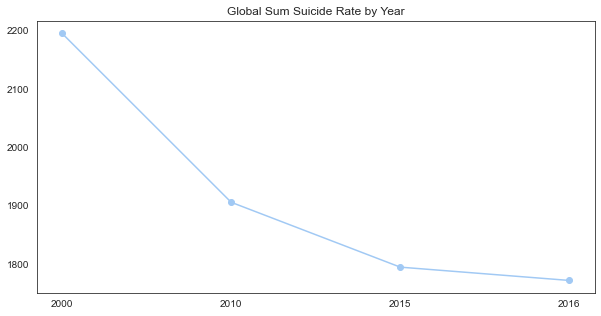

In [140]:
#Plot Global Sum Suicide Rate by Year

global_mean = df_age_both[["2000", "2010", "2015", "2016"]].sum()
plt.figure(figsize=(10, 5))
plt.title("Global Sum Suicide Rate by Year")
global_mean.plot(marker = "o")

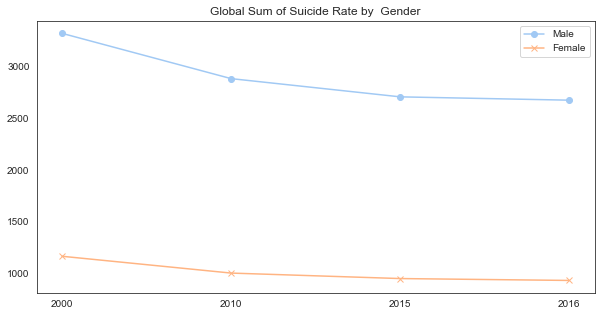

In [141]:
#Plot Global Sum of Suicide Rate by Year by Gender
plt.figure(figsize=(10, 5))
plt.title("Global Sum of Suicide Rate by  Gender")
df_age_male[["2000", "2010", "2015", "2016"]].sum().plot(marker = "o")
df_age_female[["2000", "2010", "2015", "2016"]].sum().plot(marker = "x")
plt.legend(["Male", "Female"])

In [142]:
#extract Data For India
Indf = df_age_female[df_age_female["Country"] == "India"]
Indm = df_age_male[df_age_male["Country"] == "India"]

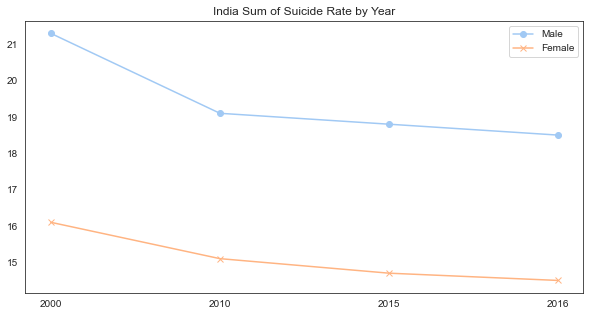

In [143]:
#Plot India Sum of Suicide Rate by Year
plt.figure(figsize=(10, 5))
plt.title("India Sum of Suicide Rate by Year")
Indm[["2000", "2010", "2015", "2016"]].sum().plot(marker = "o")
Indf[["2000", "2010", "2015", "2016"]].sum().plot(marker = "x")
plt.legend(["Male", "Female"])

In [144]:
df_age.head()

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2


In [145]:
df_age["Sum"] = df_age.sum(axis = 1)
df_age.head()

C:\Users\Kshitij\AppData\Local\Temp/ipykernel_7772/3196937642.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Country,Sex,2016,2015,2010,2000,Sum
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1,28.5
1,Afghanistan,Male,10.6,10.9,12.5,14.3,48.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7,8.0
3,Albania,Both sexes,5.6,5.3,7.7,5.8,24.4
4,Albania,Male,7.0,6.7,9.5,8.2,31.4


In [146]:
df_age_male["Sum"] = df_age_male.sum(axis = 1)
df_age_male.head()

C:\Users\Kshitij\AppData\Local\Temp/ipykernel_7772/993827829.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\Kshitij\AppData\Local\Temp/ipykernel_7772/993827829.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Sex,2016,2015,2010,2000,Sum
1,Afghanistan,Male,10.6,10.9,12.5,14.3,48.3
4,Albania,Male,7.0,6.7,9.5,8.2,31.4
7,Algeria,Male,4.9,5.0,5.1,6.7,21.7
10,Angola,Male,14.0,14.8,16.7,21.9,67.4
13,Antigua and Barbuda,Male,0.0,0.0,0.5,4.3,4.8


In [147]:
df_age_male_sort = df_age_male.sort_values("Sum", ascending = False)
df_age_male_sort.head()

,Country,Sex,2016,2015,2010,2000,Sum
406,Russian Federation,Male,48.3,49.9,62.3,85.8,246.3
289,Lithuania,Male,47.5,51.5,56.4,81.7,237.1
43,Belarus,Male,39.3,39.2,58.1,70.4,207.0
256,Kazakhstan,Male,40.1,44.2,56.1,63.1,203.5
211,Guyana,Male,46.6,46.6,44.9,41.2,179.3


In [148]:
df_age_female["Sum"] = df_age_female.sum(axis = 1)
df_age_female.head()

C:\Users\Kshitij\AppData\Local\Temp/ipykernel_7772/4059733744.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\Kshitij\AppData\Local\Temp/ipykernel_7772/4059733744.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Sex,2016,2015,2010,2000,Sum
2,Afghanistan,Female,2.1,2.1,2.1,1.7,8.0
5,Albania,Female,4.3,4.0,6.0,3.6,17.9
8,Algeria,Female,1.8,1.8,1.9,2.8,8.3
11,Angola,Female,4.6,4.7,5.1,7.2,21.6
14,Antigua and Barbuda,Female,0.9,1.6,0.0,0.1,2.6


In [149]:
df_age_female_sort = df_age_female.sort_values("Sum", ascending = False)
df_age_female_sort.head()

,Country,Sex,2016,2015,2010,2000,Sum
281,Lesotho,Female,32.6,32.1,31.0,30.2,125.9
509,Uganda,Female,18.7,19.2,22.0,23.9,83.8
359,Nigeria,Female,17.1,17.6,20.1,20.6,75.4
227,India,Female,14.5,14.7,15.1,16.1,60.4
437,Sierra Leone,Female,14.2,13.9,14.3,16.6,59.0


In [150]:
df_age_both["Sum"] = df_age_both.sum(axis = 1)
df_age_both.head()

C:\Users\Kshitij\AppData\Local\Temp/ipykernel_7772/3985693181.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\Kshitij\AppData\Local\Temp/ipykernel_7772/3985693181.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Sex,2016,2015,2010,2000,Sum
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1,28.5
3,Albania,Both sexes,5.6,5.3,7.7,5.8,24.4
6,Algeria,Both sexes,3.3,3.4,3.5,4.7,14.9
9,Angola,Both sexes,8.9,9.3,10.4,13.9,42.5
12,Antigua and Barbuda,Both sexes,0.5,0.8,0.2,2.1,3.6


In [151]:
df_age_both_sort = df_age_both.sort_values("Sum", ascending = False)

In [152]:
df_age_both_sort.head()

,Country,Sex,2016,2015,2010,2000,Sum
405,Russian Federation,Both sexes,26.5,27.5,34.5,47.5,136.0
288,Lithuania,Both sexes,25.7,28.8,31.3,46.3,132.1
210,Guyana,Both sexes,30.2,30.3,29.3,26.7,116.5
255,Kazakhstan,Both sexes,22.8,25.2,32.0,34.9,114.9
42,Belarus,Both sexes,21.4,21.2,31.9,38.7,113.2


In [153]:
male_lst = list(df_age_male_sort[:10].Country)
male_lst

['Russian Federation',
 'Lithuania',
 'Belarus',
 'Kazakhstan',
 'Guyana',
 'Ukraine',
 'Suriname',
 'Latvia',
 'Equatorial Guinea',
 'Sri Lanka']

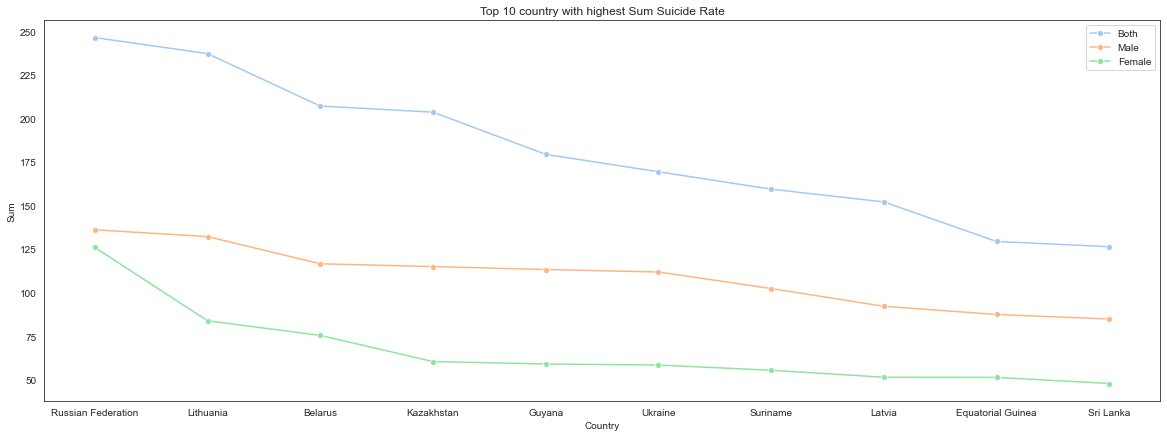

In [154]:
#Plot Top 10 country with highest Mean Suicide Rate
plt.figure(figsize=(20, 7))
data= df_age_both_sort[:10]
data2 = df_age_male_sort[:10]
data3 = df_age_female_sort[:10]
plt.title("Top 10 country with highest Sum Suicide Rate")
sns.set_style("white")
sns.lineplot(x="Country", y= "Sum", data= data2, marker = "o")
sns.lineplot(x=male_lst, y="Sum", data= data, marker = "o")
sns.lineplot(x= male_lst, y= "Sum", data= data3, marker = "o")
plt.legend(["Both", "Male", "Female"])

plt.show()

In [155]:
df_count = df_age[df_age["Sex"] != "Both sexes"]
df_count.head()

,Country,Sex,2016,2015,2010,2000,Sum
1,Afghanistan,Male,10.6,10.9,12.5,14.3,48.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7,8.0
4,Albania,Male,7.0,6.7,9.5,8.2,31.4
5,Albania,Female,4.3,4.0,6.0,3.6,17.9
7,Algeria,Male,4.9,5.0,5.1,6.7,21.7


In [156]:
df_age_male_sort.head()

,Country,Sex,2016,2015,2010,2000,Sum
406,Russian Federation,Male,48.3,49.9,62.3,85.8,246.3
289,Lithuania,Male,47.5,51.5,56.4,81.7,237.1
43,Belarus,Male,39.3,39.2,58.1,70.4,207.0
256,Kazakhstan,Male,40.1,44.2,56.1,63.1,203.5
211,Guyana,Male,46.6,46.6,44.9,41.2,179.3


In [157]:
df_age_female_sort.head()

,Country,Sex,2016,2015,2010,2000,Sum
281,Lesotho,Female,32.6,32.1,31.0,30.2,125.9
509,Uganda,Female,18.7,19.2,22.0,23.9,83.8
359,Nigeria,Female,17.1,17.6,20.1,20.6,75.4
227,India,Female,14.5,14.7,15.1,16.1,60.4
437,Sierra Leone,Female,14.2,13.9,14.3,16.6,59.0


In [158]:
df_age_both_sort.head()

,Country,Sex,2016,2015,2010,2000,Sum
405,Russian Federation,Both sexes,26.5,27.5,34.5,47.5,136.0
288,Lithuania,Both sexes,25.7,28.8,31.3,46.3,132.1
210,Guyana,Both sexes,30.2,30.3,29.3,26.7,116.5
255,Kazakhstan,Both sexes,22.8,25.2,32.0,34.9,114.9
42,Belarus,Both sexes,21.4,21.2,31.9,38.7,113.2


In [159]:
data=df_count.sort_values("Sum", ascending = False)
data.head()

,Country,Sex,2016,2015,2010,2000,Sum
406,Russian Federation,Male,48.3,49.9,62.3,85.8,246.3
289,Lithuania,Male,47.5,51.5,56.4,81.7,237.1
43,Belarus,Male,39.3,39.2,58.1,70.4,207.0
256,Kazakhstan,Male,40.1,44.2,56.1,63.1,203.5
211,Guyana,Male,46.6,46.6,44.9,41.2,179.3


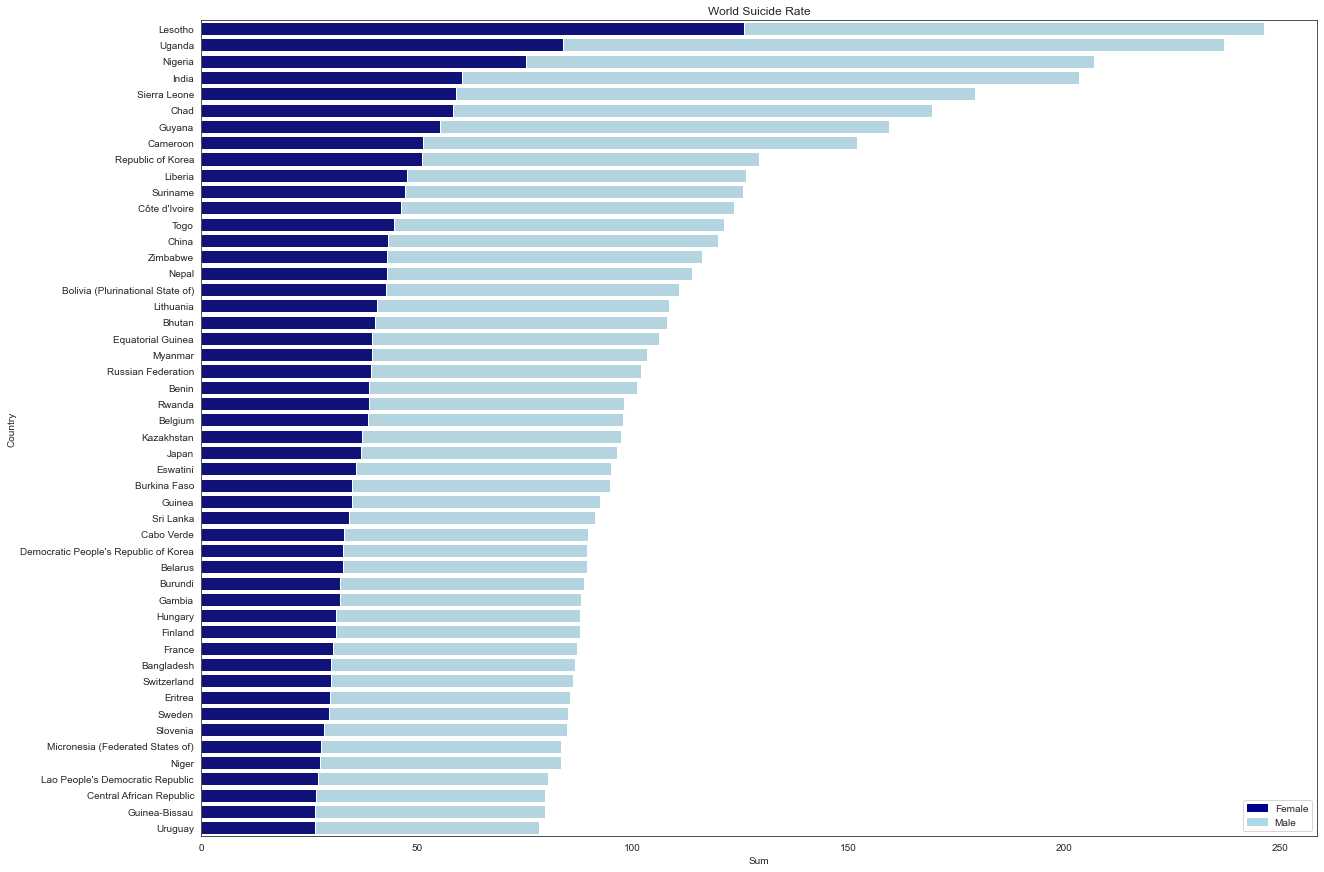

In [160]:
#sns.set_palette("pastel")
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(20, 15
                ))
plt.title("World Suicide Rate")
sns.barplot(y="Country", x="Sum", data=df_age_male_sort[:50], color = "lightblue", estimator=sum, ci=None)
sns.barplot(y="Country", x="Sum", data=df_age_female_sort[:50], color = "darkblue")


top_bar = mpatches.Patch(color='darkblue', label='Female')
bottom_bar = mpatches.Patch(color='lightblue', label='Male')
plt.legend(handles=[top_bar, bottom_bar])



Comparison of top 10 countries with highest male suicide rate

In [161]:
df_sr = pd.read_csv("master.csv")
df_sr.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [162]:
df_srs = df_sr.groupby(["year", "age"])["suicides_no"].sum()
df_srs.head()

year  age        
1985  15-24 years    17870
      25-34 years    20771
      35-54 years    35748
      5-14 years       984
      55-74 years    28736
Name: suicides_no, dtype: int64

In [163]:
df_srs = df_srs.reset_index()
df_srs = df_srs[df_srs["year"] != 2016]
df_srs.tail()

,year,age,suicides_no
181,2015,25-34 years,32118
182,2015,35-54 years,71298
183,2015,5-14 years,1681
184,2015,55-74 years,53588
185,2015,75+ years,23114


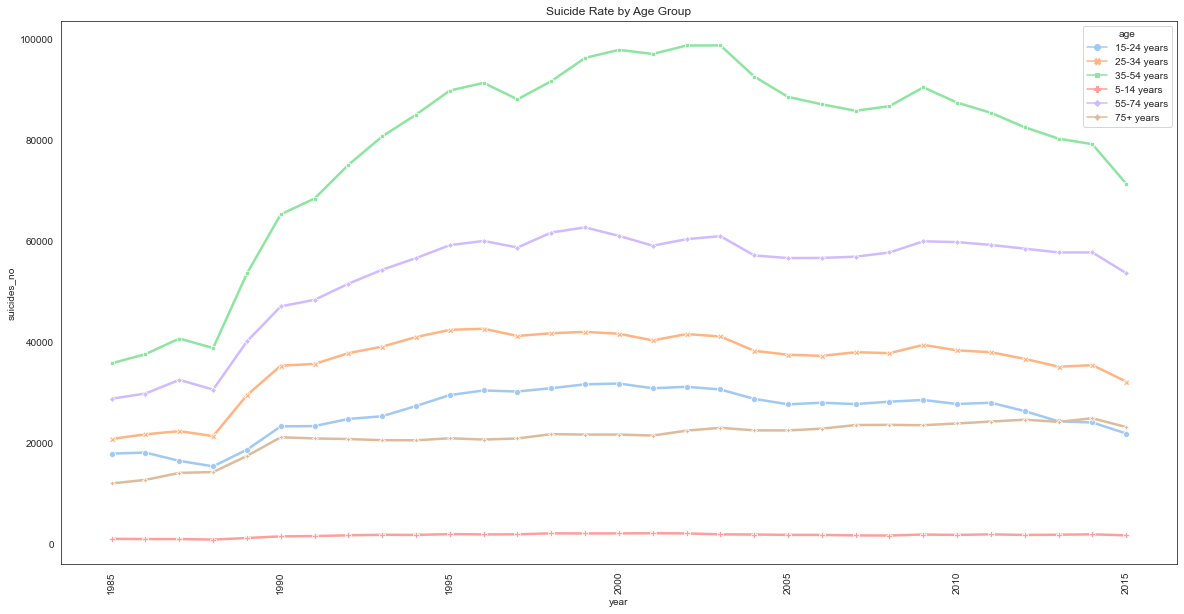

In [164]:
plt.figure(figsize=(20,10))
plt.title("Suicide Rate by Age Group")

sns.lineplot(x = "year", y= df_srs.suicides_no, hue = "age",
             data = df_srs, linewidth = 2.5, style = "age", markers=True, dashes=False)
plt.xticks(rotation = 90)
plt.show()

In [165]:
df_g = df_sr.groupby(["year", "generation"])["suicides_no", "population"].sum()
df_gen = df_g.copy().reset_index()
df_gen.head()

C:\Users\Kshitij\AppData\Local\Temp/ipykernel_7772/2368360856.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,year,generation,suicides_no,population
0,1985,Boomers,20771,173536624
1,1985,G.I. Generation,40690,192849873
2,1985,Generation X,18854,396166961
3,1985,Silent,35748,246046628
4,1986,Boomers,21685,176214788


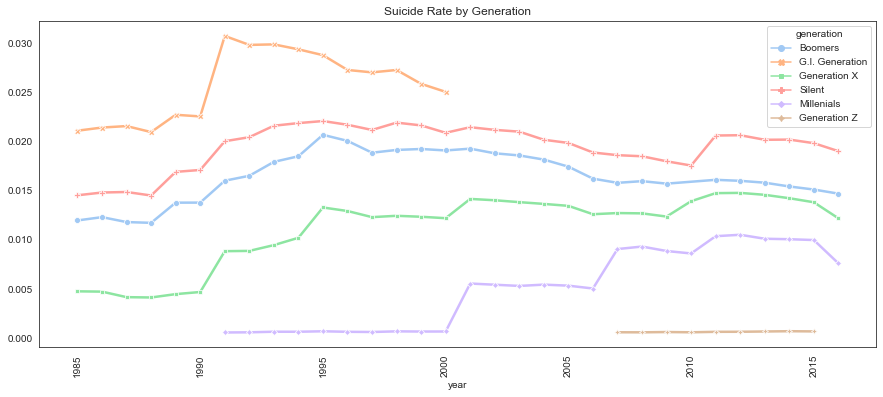

In [166]:
plt.figure(figsize=(15,6))
plt.title("Suicide Rate by Generation")

sns.lineplot(x = "year", y= df_gen.suicides_no*100/df_gen.population, hue = "generation",
             data = df_gen, linewidth = 2.5, style = "generation", markers=True, dashes=False)
plt.xticks(rotation = 90)
plt.show()

## Simple Linear Regression

In [167]:
df_age

,Country,Sex,2016,2015,2010,2000,Sum
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1,28.5
1,Afghanistan,Male,10.6,10.9,12.5,14.3,48.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7,8.0
3,Albania,Both sexes,5.6,5.3,7.7,5.8,24.4
4,Albania,Male,7.0,6.7,9.5,8.2,31.4
...,...,...,...,...,...,...,...
544,Zambia,Male,17.5,17.4,17.9,21.9,74.7
545,Zambia,Female,6.2,6.1,6.2,7.5,26.0
546,Zimbabwe,Both sexes,19.1,18.9,20.6,21.7,80.3
547,Zimbabwe,Male,29.1,28.7,32.3,35.5,125.6


In [168]:
df_reg = df_age.sort_values("Sum", ascending = False)
df_reg.reset_index(drop = True, inplace = True)
df_reg.head()

,Country,Sex,2016,2015,2010,2000,Sum
0,Russian Federation,Male,48.3,49.9,62.3,85.8,246.3
1,Lithuania,Male,47.5,51.5,56.4,81.7,237.1
2,Belarus,Male,39.3,39.2,58.1,70.4,207.0
3,Kazakhstan,Male,40.1,44.2,56.1,63.1,203.5
4,Guyana,Male,46.6,46.6,44.9,41.2,179.3


In [169]:
sex = pd.get_dummies(df_reg["Sex"], drop_first = True)
df_reg = pd.concat([df_reg, sex], axis = 1)
df_reg.head()

,Country,Sex,2016,2015,2010,2000,Sum,Female,Male
0,Russian Federation,Male,48.3,49.9,62.3,85.8,246.3,0,1
1,Lithuania,Male,47.5,51.5,56.4,81.7,237.1,0,1
2,Belarus,Male,39.3,39.2,58.1,70.4,207.0,0,1
3,Kazakhstan,Male,40.1,44.2,56.1,63.1,203.5,0,1
4,Guyana,Male,46.6,46.6,44.9,41.2,179.3,0,1


In [170]:
df_reg.drop(["Sex", "Female"], axis = 1, inplace  = True)

In [171]:
df_reg_melt = pd.melt(df_reg, id_vars = ["Country", "Male", "Sum"], var_name = "Year", value_name = "SR")
df_reg_melt.drop(columns = "Sum", inplace = True)

In [172]:
df_reg_melt

,Country,Male,Year,SR
0,Russian Federation,1,2016,48.3
1,Lithuania,1,2016,47.5
2,Belarus,1,2016,39.3
3,Kazakhstan,1,2016,40.1
4,Guyana,1,2016,46.6
...,...,...,...,...
2191,Jamaica,0,2000,0.8
2192,Grenada,0,2000,1.5
2193,Antigua and Barbuda,0,2000,0.1
2194,Bahamas,0,2000,0.7


In [173]:
#Split Data
x =df_reg_melt[['Male','Year']]
y=df_reg_melt['SR']

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_lr = LinearRegression()

In [175]:
model_lr.fit(x_train, y_train)
pred = model_lr.predict(x_test)

In [176]:
#save model
with open('Linear_reg', 'wb') as picklefile:
    pickle.dump(model_lr,picklefile)

In [177]:
model_lr.coef_

array([ 8.07808991, -0.15385804])

In [178]:
#Error checks
MAE= mean_absolute_error(y_test,pred)
MSE= mean_squared_error(y_test,pred)
RMSE= np.sqrt(mean_squared_error(y_test,pred))
r2= r2_score(y_test,pred)

In [179]:
print( "MAE:", MAE)
print( "MSE:", MSE)
print( "RMSE:", RMSE)
print( "r2:", r2)

MAE: 5.302658864579461
MSE: 52.41057017998232
RMSE: 7.239514498913744
r2: 0.15999888695836462


In [180]:
coeff= pd.DataFrame(model_lr.coef_,x.columns,columns=['Coefficient'])
coeff

,Coefficient
Male,8.078090
Year,-0.153858


r2 score isnt big enough to extract any solid conclusions, but results indicate the following:

Being male increases suicide rate by 8.08 points

For every year we go back from this dataset (2016,2015,2010,2000) the suicide rate goes up by 0.154

Formular for calculating the suicide rate of a Male will therefore be expressed as: 

### y = mx + c
### y = 8.01x - 0.154

considering all things being equal!

## Worldwide Sucide Map 2016

In [181]:
#2016
df_2016=df_age_both.drop(columns=['2015','2010','2000'])
df_2016=pd.melt(df_2016,id_vars=['Country','Sex'],var_name='Year',value_name='sr')


In [182]:
cloro= dict(type='choropleth',
            locations=df_2016['Country'],
            locationmode='country names',
            z=df_2016['sr'],
            text=df_2016['Country'],
            colorscale='blues_r',
            reversescale=True,
            colorbar={'title':'suicide rate per 100.000 humans'})

layout= dict(title= 'Worldwide Suicide rate in 2016',
             geo= dict(showframe=True,
                       showcoastlines=True,
                      projection={'type':'miller'}))

choromap3= go.Figure(data=[cloro],layout=layout)

mapplot = iplot(choromap3)
mapplot

#py.plot(mapplot, filename = 'Worldwide Suicide rate in 2016', auto_open = False)

In [183]:
choromap3.write_html("suicidemap.html")

In [184]:
df_sro = pd.read_csv("master.csv")
df_sro.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [185]:
df_sro_sex = pd.DataFrame(df_sro[["country", "sex","suicides_no"]], columns = ["country", "sex", "suicides_no"])
df_sro_sex.head()

,country,sex,suicides_no
0,Albania,male,21
1,Albania,male,16
2,Albania,female,14
3,Albania,male,1
4,Albania,male,9


In [186]:
df_sro_m = df_sro_sex[df_sro_sex["sex"] == "male"]
df_sro_m.head()

,country,sex,suicides_no
0,Albania,male,21
1,Albania,male,16
3,Albania,male,1
4,Albania,male,9
8,Albania,male,1


In [187]:
df_sro_f = df_sro_sex[df_sro_sex["sex"] == "female"]
df_sro_f.head()

,country,sex,suicides_no
2,Albania,female,14
5,Albania,female,1
6,Albania,female,6
7,Albania,female,4
9,Albania,female,0


In [188]:
msum = df_sro_m["suicides_no"].sum()
msum

5188910

In [189]:
fsum = df_sro_f["suicides_no"].sum()
fsum

1559510

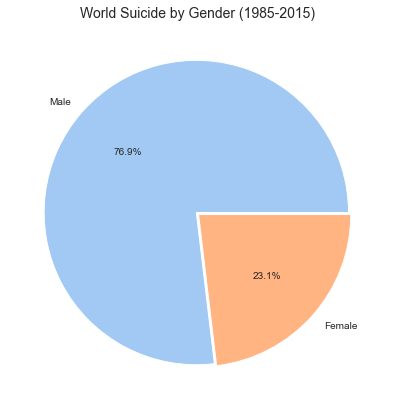

In [190]:
#pie chart of world suicide rate by sex 1985-2016

data = [msum, fsum]
labels = ["Male", "Female"]
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(10, 7))
plt.title("World Suicide by Gender (1985-2015)", fontsize=14);
plt.pie(data, labels = labels, colors = colors, explode=[0.01]*2, autopct='%.1f%%')
plt.show()

In [191]:
df_sro.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [192]:
df_sro_age = df_sro[["age", "suicides_no"]]
df_sro_age.head()

,age,suicides_no
0,15-24 years,21
1,35-54 years,16
2,15-24 years,14
3,75+ years,1
4,25-34 years,9


In [193]:
lst = []
for i in df_sro_age["age"].unique():
    dat = df_sro_age[df_sro_age["age"] == i]
    lst.append(dat)
    print(lst)

[               age  suicides_no
0      15-24 years           21
2      15-24 years           14
13     15-24 years           17
17     15-24 years            8
28     15-24 years           12
...            ...          ...
27788  15-24 years          311
27798  15-24 years          323
27799  15-24 years          320
27810  15-24 years          347
27812  15-24 years          347

[4642 rows x 2 columns]]
[               age  suicides_no
0      15-24 years           21
2      15-24 years           14
13     15-24 years           17
17     15-24 years            8
28     15-24 years           12
...            ...          ...
27788  15-24 years          311
27798  15-24 years          323
27799  15-24 years          320
27810  15-24 years          347
27812  15-24 years          347

[4642 rows x 2 columns],                age  suicides_no
1      35-54 years           16
6      35-54 years            6
15     35-54 years           14
21     35-54 years            4
26     35-54 years

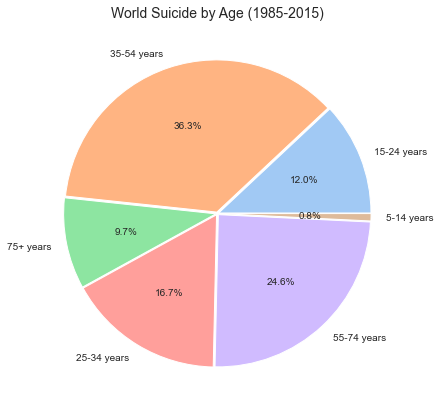

In [194]:
#pie chart of world suicide rate by age group 1985-2016

data = [lst[0]["suicides_no"].sum(), lst[1]["suicides_no"].sum(), lst[2]["suicides_no"].sum(),
       lst[3]["suicides_no"].sum(), lst[4]["suicides_no"].sum(), lst[5]["suicides_no"].sum()]
labels = ['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years']
colors = sns.color_palette('pastel')[0:6]

plt.figure(figsize=(10, 7))
plt.title("World Suicide by Age (1985-2015)", fontsize=14);
plt.pie(data, labels = labels, colors = colors, explode=[0.01]*6, autopct='%.1f%%')
plt.show()

In [195]:
df_sro.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [196]:
df_sro_year = df_sro[["year", "age", "suicides/100k pop"]]
df_sro_year.rename(columns = {"suicides/100k pop": "sr/100"}, inplace = True)
df_sro_year

c:\Users\Kshitij\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,age,sr/100
0,1987,15-24 years,6.71
1,1987,35-54 years,5.19
2,1987,15-24 years,4.83
3,1987,75+ years,4.59
4,1987,25-34 years,3.28
...,...,...,...
27815,2014,35-54 years,2.96
27816,2014,75+ years,2.58
27817,2014,5-14 years,2.17
27818,2014,5-14 years,1.67


In [197]:
df_sro_year["year"].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

In [198]:
collect = []
for i in df_sro_year["year"].unique():
    dat = df_sro_year[df_sro_year["year"] == i]
    cal = round( dat["sr/100"].sum(), 2)
    collect.append(cal)
print(collect)

[7545.45, 7473.13, 8036.54, 10528.88, 10790.29, 11483.79, 14660.26, 14142.21, 13817.83, 14150.72, 14473.91, 14387.45, 14276.21, 14227.72, 13627.58, 12581.8, 12164.99, 12166.01, 12410.15, 12145.84, 12176.04, 11843.99, 6811.89, 6579.84, 9878.75, 10321.06, 11101.91, 10663.64, 10306.73, 8253.99, 11367.84, 2147.39]


In [199]:
len(collect)

32

In [200]:
year = pd.DataFrame([df_sro_year["year"].unique(), collect])
year.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1987.00,1988.00,1989.00,1992.00,1993.00,1994.00,1995.00,1996.00,1997.00,1998.00,...,1985.00,1986.00,1990.00,1991.00,2012.00,2013.00,2014.00,2015.00,2011.00,2016.00
1,7545.45,7473.13,8036.54,10528.88,10790.29,11483.79,14660.26,14142.21,13817.83,14150.72,...,6811.89,6579.84,9878.75,10321.06,11101.91,10663.64,10306.73,8253.99,11367.84,2147.39


In [201]:
year = year.T
year.rename(columns = {0 : "year", 1 : "sr/100k"}, inplace = True)

In [202]:
#Plot Suicide rate per 100k pop
df = year.sort_values("year")[:31]
fig = px.line(df, x="year", y="sr/100k", title='Suicide Rate per 100k pop', markers=True)

fig.show()

#py.plot(fig, filename = 'Suicide Rate per 100k pop', auto_open = False)

In [203]:
df_sro.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [204]:
df_sro_gend = df_sro[["year", "sex", "suicides/100k pop"]]
df_sro_gend.rename(columns = {"suicides/100k pop": "sr/100"}, inplace = True)
df_sro_gend.head()

c:\Users\Kshitij\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,sex,sr/100
0,1987,male,6.71
1,1987,male,5.19
2,1987,female,4.83
3,1987,male,4.59
4,1987,male,3.28


In [205]:
df_sro_m = df_sro_gend[df_sro_gend["sex"] == "male"]
df_sro_m.head()

,year,sex,sr/100
0,1987,male,6.71
1,1987,male,5.19
3,1987,male,4.59
4,1987,male,3.28
8,1987,male,0.73


In [206]:
collectm = []
for i in df_sro_m["year"].unique():
    dat = df_sro_m[df_sro_m["year"] == i]
    cal = round( dat["sr/100"].sum(), 2)
    collectm.append(cal)
print(collectm)

[5688.24, 5614.05, 6109.37, 8091.51, 8438.1, 8937.86, 11655.66, 11224.97, 11043.64, 11268.97, 11551.76, 11403.42, 11376.47, 11334.97, 10891.55, 10034.52, 9641.16, 9733.79, 9833.24, 9606.34, 9757.96, 9517.56, 5148.14, 4905.79, 7610.46, 8006.32, 8904.4, 8567.86, 8220.01, 6522.9, 9126.17, 1761.9]


In [207]:
ma = pd.DataFrame([df_sro_year["year"].unique(), collectm])
ma = ma.T
ma.rename(columns = {0 : "year", 1 : "sr/100k"}, inplace = True)

In [208]:
ma.head()

,year,sr/100k
0,1987.0,5688.24
1,1988.0,5614.05
2,1989.0,6109.37
3,1992.0,8091.51
4,1993.0,8438.10


In [209]:
#Plot Suicide rate per 100k pop
df = ma.sort_values("year")[:31]
fig = px.line(df, x="year", y="sr/100k", title='Suicide Rate per 100k pop Male', markers=True)

fig.show()

#py.plot(fig, filename = 'Suicide Rate per 100k pop Male', auto_open = False)

In [210]:
df_sro_f = df_sro_gend[df_sro_gend["sex"] == "female"]
df_sro_f.head()

,year,sex,sr/100
2,1987,female,4.83
5,1987,female,2.81
6,1987,female,2.15
7,1987,female,1.56
9,1987,female,0.00


In [211]:
collectf= []
for i in df_sro_f["year"].unique():
    dat = df_sro_f[df_sro_f["year"] == i]
    cal = round( dat["sr/100"].sum(), 2)
    collectf.append(cal)
print(collectf)

[1857.21, 1859.08, 1927.17, 2437.37, 2352.19, 2545.93, 3004.6, 2917.24, 2774.19, 2881.75, 2922.15, 2984.03, 2899.74, 2892.75, 2736.03, 2547.28, 2523.83, 2432.22, 2576.91, 2539.5, 2418.08, 2326.43, 1663.75, 1674.05, 2268.29, 2314.74, 2197.51, 2095.78, 2086.72, 1731.09, 2241.67, 385.49]


In [212]:
fe = pd.DataFrame([df_sro_f["year"].unique(), collectf])
fe = fe.T
fe.rename(columns = {0 : "year", 1 : "sr/100k"}, inplace = True)
fe.head

<bound method NDFrame.head of       year  sr/100k
0   1987.0  1857.21
1   1988.0  1859.08
2   1989.0  1927.17
3   1992.0  2437.37
4   1993.0  2352.19
5   1994.0  2545.93
6   1995.0  3004.60
7   1996.0  2917.24
8   1997.0  2774.19
9   1998.0  2881.75
10  1999.0  2922.15
11  2000.0  2984.03
12  2001.0  2899.74
13  2002.0  2892.75
14  2003.0  2736.03
15  2004.0  2547.28
16  2005.0  2523.83
17  2006.0  2432.22
18  2007.0  2576.91
19  2008.0  2539.50
20  2009.0  2418.08
21  2010.0  2326.43
22  1985.0  1663.75
23  1986.0  1674.05
24  1990.0  2268.29
25  1991.0  2314.74
26  2012.0  2197.51
27  2013.0  2095.78
28  2014.0  2086.72
29  2015.0  1731.09
30  2011.0  2241.67
31  2016.0   385.49>

In [213]:
#Plot Suicide rate per 100k pop Female
df = fe.sort_values("year")[:31]
fig = px.line(df, x="year", y="sr/100k", title='Suicide Rate per 100k pop Female', markers=True)

fig.show()

#py.plot(fig, filename = 'Suicide Rate per 100k pop Female', auto_open = False)

In [214]:
ma = ma.sort_values("year")[:31]
fe = fe.sort_values("year")[:31]
md = ma["sr/100k"]
fd = fe["sr/100k"]

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=ma["year"], y=md,
                    mode='lines+markers',
                    name='male'))
fig.add_trace(go.Scatter(x=ma["year"], y=fd,
                    mode='lines+markers',
                    name='female'))
fig.update_layout(title='Suicide rate per 100 pop by Gender')
                 


fig.show()

#py.plot(fig, filename = 'Suicide Rate per 100k pop by Gender', auto_open = False)

In [215]:
df_sro.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [216]:
df_sro.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [217]:
nig = df_sro[df_sro["country"]  == "Iceland"]
nig

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
11674,Iceland,1985,male,15-24 years,7,21900,31.96,Iceland1985,0.776,"2,939,845,038",13357,Generation X
11675,Iceland,1985,male,55-74 years,5,16400,30.49,Iceland1985,0.776,"2,939,845,038",13357,G.I. Generation
11676,Iceland,1985,male,35-54 years,7,25800,27.13,Iceland1985,0.776,"2,939,845,038",13357,Silent
11677,Iceland,1985,male,25-34 years,5,20500,24.39,Iceland1985,0.776,"2,939,845,038",13357,Boomers
11678,Iceland,1985,female,55-74 years,4,17500,22.86,Iceland1985,0.776,"2,939,845,038",13357,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...,...
12051,Iceland,2016,female,25-34 years,2,23233,8.61,Iceland2016,NaN,"20,304,098,101",64708,Millenials
12052,Iceland,2016,female,55-74 years,2,32963,6.07,Iceland2016,NaN,"20,304,098,101",64708,Boomers
12053,Iceland,2016,female,15-24 years,0,22971,0.00,Iceland2016,NaN,"20,304,098,101",64708,Millenials
12054,Iceland,2016,female,35-54 years,0,43216,0.00,Iceland2016,NaN,"20,304,098,101",64708,Generation X


In [218]:
df_cru = pd.read_csv("crudeSuicideRates.csv")
df_cru

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Crude suicide rates (per 100 000 population),Both sexes,0.0
1,Afghanistan,2016,Crude suicide rates (per 100 000 population),Male,0.0
2,Afghanistan,2016,Crude suicide rates (per 100 000 population),Female,0.0
3,Afghanistan,2015,Crude suicide rates (per 100 000 population),Both sexes,4.8
4,Afghanistan,2015,Crude suicide rates (per 100 000 population),Male,7.8
...,...,...,...,...,...
2740,Zimbabwe,2005,Crude suicide rates (per 100 000 population),Male,21.7
2741,Zimbabwe,2005,Crude suicide rates (per 100 000 population),Female,6.4
2742,Zimbabwe,2000,Crude suicide rates (per 100 000 population),Both sexes,12.9
2743,Zimbabwe,2000,Crude suicide rates (per 100 000 population),Male,20.6


In [219]:
both = df_cru[df_cru["Dim1"]  != "Both sexes"]
both.head()

,Location,Period,Indicator,Dim1,First Tooltip
1,Afghanistan,2016,Crude suicide rates (per 100 000 population),Male,0.0
2,Afghanistan,2016,Crude suicide rates (per 100 000 population),Female,0.0
4,Afghanistan,2015,Crude suicide rates (per 100 000 population),Male,7.8
5,Afghanistan,2015,Crude suicide rates (per 100 000 population),Female,1.5
7,Afghanistan,2010,Crude suicide rates (per 100 000 population),Male,8.6


In [220]:
both.drop(["Location"], axis = 1, inplace = True)
both.head()

c:\Users\Kshitij\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Period,Indicator,Dim1,First Tooltip
1,2016,Crude suicide rates (per 100 000 population),Male,0.0
2,2016,Crude suicide rates (per 100 000 population),Female,0.0
4,2015,Crude suicide rates (per 100 000 population),Male,7.8
5,2015,Crude suicide rates (per 100 000 population),Female,1.5
7,2010,Crude suicide rates (per 100 000 population),Male,8.6


In [221]:
gend = pd.get_dummies(both["Dim1"], drop_first = True)
both = pd.concat([both, gend], axis = 1)
both.head()

,Period,Indicator,Dim1,First Tooltip,Male
1,2016,Crude suicide rates (per 100 000 population),Male,0.0,1
2,2016,Crude suicide rates (per 100 000 population),Female,0.0,0
4,2015,Crude suicide rates (per 100 000 population),Male,7.8,1
5,2015,Crude suicide rates (per 100 000 population),Female,1.5,0
7,2010,Crude suicide rates (per 100 000 population),Male,8.6,1


In [222]:
both = both.loc[3:]
both.head()

,Period,Indicator,Dim1,First Tooltip,Male
4,2015,Crude suicide rates (per 100 000 population),Male,7.8,1
5,2015,Crude suicide rates (per 100 000 population),Female,1.5,0
7,2010,Crude suicide rates (per 100 000 population),Male,8.6,1
8,2010,Crude suicide rates (per 100 000 population),Female,1.4,0
10,2005,Crude suicide rates (per 100 000 population),Male,10.8,1


In [223]:
both.drop("Dim1", axis = 1, inplace = True)

In [224]:
both["Male"] = both["Male"].astype(float)

In [225]:
both.head()

,Period,Indicator,First Tooltip,Male
4,2015,Crude suicide rates (per 100 000 population),7.8,1.0
5,2015,Crude suicide rates (per 100 000 population),1.5,0.0
7,2010,Crude suicide rates (per 100 000 population),8.6,1.0
8,2010,Crude suicide rates (per 100 000 population),1.4,0.0
10,2005,Crude suicide rates (per 100 000 population),10.8,1.0


In [226]:
both_x = both[["Male", "Period"]]

In [227]:
pred2 = model_lr.predict(both_x)

c:\Users\Kshitij\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Period
Feature names seen at fit time, yet now missing:
- Year




In [228]:
pred2

array([15.32113288,  7.24304297, 16.0904231 , ...,  8.78162341,
       17.62900354,  9.55091363])

In [229]:
both["Prediction"] = pred2
both

,Period,Indicator,First Tooltip,Male,Prediction
4,2015,Crude suicide rates (per 100 000 population),7.8,1.0,15.321133
5,2015,Crude suicide rates (per 100 000 population),1.5,0.0,7.243043
7,2010,Crude suicide rates (per 100 000 population),8.6,1.0,16.090423
8,2010,Crude suicide rates (per 100 000 population),1.4,0.0,8.012333
10,2005,Crude suicide rates (per 100 000 population),10.8,1.0,16.859713
...,...,...,...,...,...
2738,2010,Crude suicide rates (per 100 000 population),6.1,0.0,8.012333
2740,2005,Crude suicide rates (per 100 000 population),21.7,1.0,16.859713
2741,2005,Crude suicide rates (per 100 000 population),6.4,0.0,8.781623
2743,2000,Crude suicide rates (per 100 000 population),20.6,1.0,17.629004


In [230]:
df_age_both.head()

,Country,Sex,2016,2015,2010,2000,Sum
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1,28.5
3,Albania,Both sexes,5.6,5.3,7.7,5.8,24.4
6,Algeria,Both sexes,3.3,3.4,3.5,4.7,14.9
9,Angola,Both sexes,8.9,9.3,10.4,13.9,42.5
12,Antigua and Barbuda,Both sexes,0.5,0.8,0.2,2.1,3.6


In [231]:
both = both.groupby("Period").sum()
both

,First Tooltip,Male,Prediction
Period,,,
2000,4005.2,183.0,4973.924842
2005,3822.5,183.0,4692.364622
2010,3631.5,183.0,4410.804401
2015,3455.6,183.0,4129.244181
2016,5.0,182.0,4050.675677


In [232]:
both_df = both.copy()
both_df = both_df.reset_index()


In [233]:
both_df.head()

,Period,First Tooltip,Male,Prediction
0,2000,4005.2,183.0,4973.924842
1,2005,3822.5,183.0,4692.364622
2,2010,3631.5,183.0,4410.804401
3,2015,3455.6,183.0,4129.244181
4,2016,5.0,182.0,4050.675677


In [234]:
both_df = both_df.drop("Male", axis = 1)
both_df = both_df.rename(columns = {"Period": "Year", "First Tooltip": "Suicide Rate" })
both_df.head()

,Year,Suicide Rate,Prediction
0,2000,4005.2,4973.924842
1,2005,3822.5,4692.364622
2,2010,3631.5,4410.804401
3,2015,3455.6,4129.244181
4,2016,5.0,4050.675677


In [235]:
nig = df_cru[df_cru["Location"]  == "India"]
nig

,Location,Period,Indicator,Dim1,First Tooltip
1125,India,2016,Crude suicide rates (per 100 000 population),Both sexes,0.5
1126,India,2016,Crude suicide rates (per 100 000 population),Male,0.4
1127,India,2016,Crude suicide rates (per 100 000 population),Female,0.6
1128,India,2015,Crude suicide rates (per 100 000 population),Both sexes,16.5
1129,India,2015,Crude suicide rates (per 100 000 population),Male,18.0
1130,India,2015,Crude suicide rates (per 100 000 population),Female,14.9
1131,India,2010,Crude suicide rates (per 100 000 population),Both sexes,16.5
1132,India,2010,Crude suicide rates (per 100 000 population),Male,17.7
1133,India,2010,Crude suicide rates (per 100 000 population),Female,15.2
1134,India,2005,Crude suicide rates (per 100 000 population),Both sexes,17.6


In [236]:
nig = nig[["Location", "Period", "Dim1", "First Tooltip"]]
nig.head()

,Location,Period,Dim1,First Tooltip
1125,India,2016,Both sexes,0.5
1126,India,2016,Male,0.4
1127,India,2016,Female,0.6
1128,India,2015,Both sexes,16.5
1129,India,2015,Male,18.0


In [237]:
nig.rename(columns = {"Location": "country", "Period" : "year", "Dim1": "sex", "First Tooltip" : "suicide rate"}, inplace = True)
nig.head()

c:\Users\Kshitij\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,year,sex,suicide rate
1125,India,2016,Both sexes,0.5
1126,India,2016,Male,0.4
1127,India,2016,Female,0.6
1128,India,2015,Both sexes,16.5
1129,India,2015,Male,18.0


In [238]:
nig = nig[nig.sex != "Both sexes"]
nig.head()

,country,year,sex,suicide rate
1126,India,2016,Male,0.4
1127,India,2016,Female,0.6
1129,India,2015,Male,18.0
1130,India,2015,Female,14.9
1132,India,2010,Male,17.7


In [239]:
#Plot India Suicide rate per 100k pop
df = nig[2:]
fig = px.line(df, x="year", y="suicide rate", title='India Suicide Rate per 100k pop', color = "sex", markers=True)

fig.show()

py.plot(fig, filename = 'India Suicide Rate per 100k pop', auto_open = False)

PlotlyRequestError: No such user

In [ ]:
df_cru.drop("Indicator", inplace = True, axis = 1)

In [ ]:
df_cru_m = df_cru[df_cru["Dim1"] == "Both sexes"]
df_cru_m.head()

,Location,Period,Dim1,First Tooltip
0,Afghanistan,2016,Both sexes,0.0
3,Afghanistan,2015,Both sexes,4.8
6,Afghanistan,2010,Both sexes,5.1
9,Afghanistan,2005,Both sexes,6.3
12,Afghanistan,2000,Both sexes,5.7


In [ ]:
df_cru_m.drop("Dim1", axis = 1, inplace = True)

c:\Users\Kshitij\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_cru_m = df_cru_m[df_cru_m.Period != 2016]

In [ ]:
df_cru_m.head()

,Location,Period,First Tooltip
3,Afghanistan,2015,4.8
6,Afghanistan,2010,5.1
9,Afghanistan,2005,6.3
12,Afghanistan,2000,5.7
18,Albania,2015,6.0


In [ ]:
df_cru_m.sort_values("Period")

,Location,Period,First Tooltip
2742,Zimbabwe,2000,12.9
2202,Singapore,2000,12.4
807,Eritrea,2000,11.6
1647,Montenegro,2000,10.4
2187,Sierra Leone,2000,11.1
...,...,...,...
918,Gambia,2015,5.2
2133,Senegal,2015,6.2
903,Gabon,2015,7.3
1983,Republic of Moldova,2015,16.4


In [ ]:
df_cru_m.Location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Côte d’Ivoire',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gree

In [ ]:
count_lst = ["Afghanistan", "India", "United States of America", "Liberia", "Canada", "Lesotho", "Zambia", "Ghana", "Russian Federation"]

In [ ]:
df_c = df_cru_m['Location'].isin(count_lst)
df_country = df_cru_m[df_c]
df_country

,Location,Period,First Tooltip
3,Afghanistan,2015,4.8
6,Afghanistan,2010,5.1
9,Afghanistan,2005,6.3
12,Afghanistan,2000,5.7
453,Canada,2015,12.5
456,Canada,2010,13.0
459,Canada,2005,13.2
462,Canada,2000,13.0
963,Ghana,2015,5.3
966,Ghana,2010,4.7


In [ ]:
fig2 = px.line(df_country, x="Period", y='First Tooltip', color="Location" )
fig2

